# Predicting Wholefoods Locations
### By: Annie DeForge

## Installation

#### The package to run a neural network is not automatically installed on Juypter Notebooks, so the code below installs the tensorflow package, the parent package for keras, which we will need to for the neural network model.

In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Import Packages

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

## Loading the Data

#### Load the unified data into a pandas dataframe. The unified data was created by manipulating a dataset of Wholefoods locations to be grouped by county so that it could be merged with the county level American Community Survey data that was used in this project as the response variable in the neural network. The process invovled multiple merges of three different datasets and the code is included in the appendix.

In [3]:
input_data = pd.read_csv("model_input_data.csv")

## Spltiing the Data

#### The neural network requires that the whole dataset is split so that unqiue data values are available for the different steps in building the neural network. The data needs to be split into training data, which takes up the bulk of the data, a portion for validation, and the last portion is for testing the model.

In [4]:
X = input_data.iloc[:, 3:12].dropna()
Y = input_data.HasWholefoods
scaler = preprocessing.MinMaxScaler()
X_scale = scaler.fit_transform(X)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

#### Columns 3 through 12 are the predictor variables and are called and stored in X, while the HasWholefoods column is the response variable is stored in Y. For the neural network, the response variable needs to be categorical, however, the data cannot be string data so HasWholefoods stores its data as an int where 1 is equal to true and 0 is equal to false.

#### The function train_test_split() is used to split the data into the necessary parts. train_test_split() only splits the data in two as time so two statements are required. The argument test_size splits the declared percentage into training and testing for both X and Y. The first statement splits 30% for testing, however, this 30% is split into 50% for validation and testing. Therefore, the ultimate breakdown is 70% training, 15% validation, and 15% testing.

## Building the Neural Network

#### The keras package is used to create a neural network with an input layer, output layer, and two hidden layers. Each of the hidden layers has 8 neurons. The input layer has 9 nodes because there are 9 predictors and the output layer has 1 node because there is 1 output. 

In [5]:
model = Sequential()

model.add(Dense(8, activation='relu', input_shape=(9,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
             metrics=['accuracy'])

In [6]:
hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=4, epochs=90)

Epoch 1/90
550/550 [==============================] - 5s 7ms/step - loss: 0.4224 - accuracy: 0.9495 - val_loss: 0.2224 - val_accuracy: 0.9448
Epoch 2/90
550/550 [==============================] - 1s 2ms/step - loss: 0.2160 - accuracy: 0.9462 - val_loss: 0.2148 - val_accuracy: 0.9448
Epoch 3/90
550/550 [==============================] - 1s 2ms/step - loss: 0.2035 - accuracy: 0.9486 - val_loss: 0.2124 - val_accuracy: 0.9448
Epoch 4/90
550/550 [==============================] - 1s 2ms/step - loss: 0.2006 - accuracy: 0.9488 - val_loss: 0.2097 - val_accuracy: 0.9448
Epoch 5/90
550/550 [==============================] - 1s 2ms/step - loss: 0.2060 - accuracy: 0.9461 - val_loss: 0.2061 - val_accuracy: 0.9448
Epoch 6/90
550/550 [==============================] - 1s 2ms/step - loss: 0.2083 - accuracy: 0.9444 - val_loss: 0.2019 - val_accuracy: 0.9448
Epoch 7/90
550/550 [==============================] - 1s 2ms/step - loss: 0.1977 - accuracy: 0.9470 - val_loss: 0.1974 - val_accuracy: 0.9448
Epoch 

550/550 [==============================] - 1s 2ms/step - loss: 0.0789 - accuracy: 0.9617 - val_loss: 0.0683 - val_accuracy: 0.9597
Epoch 59/90
550/550 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9673 - val_loss: 0.0677 - val_accuracy: 0.9597
Epoch 60/90
550/550 [==============================] - 1s 2ms/step - loss: 0.0896 - accuracy: 0.9575 - val_loss: 0.0684 - val_accuracy: 0.9597
Epoch 61/90
550/550 [==============================] - 1s 2ms/step - loss: 0.0903 - accuracy: 0.9589 - val_loss: 0.0672 - val_accuracy: 0.9597
Epoch 62/90
550/550 [==============================] - 1s 3ms/step - loss: 0.0851 - accuracy: 0.9662 - val_loss: 0.0697 - val_accuracy: 0.9660
Epoch 63/90
550/550 [==============================] - 1s 3ms/step - loss: 0.0864 - accuracy: 0.9593 - val_loss: 0.0667 - val_accuracy: 0.9597
Epoch 64/90
550/550 [==============================] - 1s 3ms/step - loss: 0.0930 - accuracy: 0.9578 - val_loss: 0.0672 - val_accuracy: 0.9639
Epoch 65/90

#### The layers are added with a ReLU activation for the hidden layers, an input shape to match with the number of predictors is required for the first hidden layer. The outer layter uses a sigmoid activation. I also tried a softmax activation but found that the sigmoid gave better results. 

#### Once the layers to the network are added, the network needs to be compiled. The optimizer that I used was a stochastic gradient descent or "sgd". The loss was a set to binary crossentropy and accuracy was measured by the model as it was training. 

#### Lastly, the fit() function was used to fit the training and validation data that was seperated before. I found that lowering the batch size in this step produced better results in the next step.

## Evaluate the Model

#### The last step of building the neural network is to test how accurate it is on a new set of data. We use the evaluate() function in order to understand how the model is function with the new data

In [7]:
model.evaluate(X_test, Y_test)[1]

15/15 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.9682


0.9682203531265259

#### The model is evaluated on the X_test and Y_test data that the neural network has not seen yet. The function evaluate outputs the loss and accuracy of the neural network on the test data. The [1] is used to output the model accuracy because this is the second number calculated by the evaluate() function.

#### From the output, we can see that the model handles the new test data with an accuracy of 95%-97%, which means that we have a model that is accurate and that accuracy is consistant with training data.

## Visualizing Loss

#### To understand if the data is fitting properly, we need to visualize the data the loss data that was created by the fit() function. The fit() function was saved into the keras callback hist, where hist.history is an array that stores the accuracy metrics of the training and validation data.

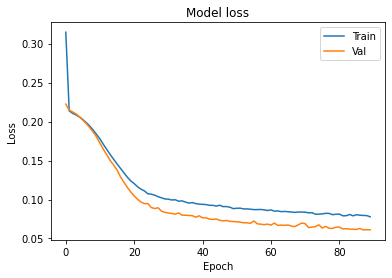

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### The output is a line graph showing the training and validation loss over the number of epochs, which was set to 100 in model.fit(). It seems like the loss for the training and validation data match up and are descreasing similarly as epochs increases, which is what we are looking for.

## Visualizing Accuracy

#### The second visualization to understand fit requires the accuracy data that was created by the fit() function. The line plot is the same type as above but instead the graph calls ['accuracy'] and ['val_accuracy'].

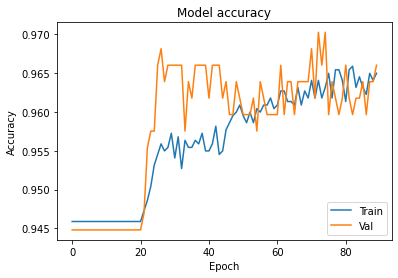

In [9]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#### I have found that there tends to be more variation in the accuracy than the loss for my neural network. Although sometimes there is a lot of noise in the accuacy values, especially for lower epochs. It seems like the improvements in the validation set match with the improvments in the validation set. This indicates that overfitting is not a huge problem.

## Appendix

#### Merging the data to create the final united dataset for input into the neural network

In [10]:
# census = pd.read_csv('census_data.csv', dtype={'CensusId':str})
# census = census[census['State'] !='Puerto Rico']
# cities = pd.read_csv('uscities.csv', dtype={'county_fips': str})
# cities['city'] = cities['city']+","+cities['state_id']
# wholefoods = pd.read_csv('original_wf_data.csv')['city']

# wholefoods2 = pd.merge(wholefoods, cities, on=['city'])[['county_fips', 'state_name', 'county_name']]
# print(wholefoods2)
# wholefoods3 = wholefoods2.groupby(['county_fips', 'state_name', 'county_name']).count().reset_index()
# wholefoods3['HasWholefoods'] = 1
# print(wholefoods3)
# united_data = pd.merge(wholefoods3, census, left_on=['county_fips'], right_on=['CensusId'], how='right')
# input_data = united_data[['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'White', 'Black', 'Hispanic', 'Asian', 'IncomePerCap', 'Unemployment', 'HasWholefoods']]
# input_data = input_data.fillna(value={'HasWholefoods':0})
# input_data.to_csv("model_input_data.csv")

#### Producing a map of location data for Wholefoods in the US

In [11]:
# import matplotlib.image as mpimg
# map_img = mpimg.imread('US_map.png')

# wf = pd.read_csv('original_wf_data.csv')
# wf['count']=1
# wf= pd.merge(wf, cities, on=['city'])[['latitude', 'longitude','county_fips', 'state_name', 'county_name', 'count']]
# print(wholefoods2)
# wholefoods3 = wf.groupby(['county_fips', 'state_name', 'county_name']).agg({'longitude':'mean', 'latitude':'mean', 'count':'sum'})
# wholefoods3 = pd.DataFrame(wholefoods3).reset_index()
# wholefoods3 = wholefoods3[wholefoods3['state_name']!='Hawaii']
# wholefoods3 = wholefoods3[wholefoods3['state_name']!='Alaska']
# wholefoods3.plot(kind='scatter', x='longitude', y='latitude',
#         s='count',
#         alpha=1)
# frame1 = plt.gca()
# plt.imshow(map_img, extent=[-125.5,-66.5, 25, 49],alpha=0.5)
# frame1.axes.get_xaxis().set_visible(False)
# frame1.axes.get_yaxis().set_visible(False)
# plt.title('Wholefoods Locations')
# plt.show()

#### Merging the data differently so that instead of creating a column HasWholefoods with 0s or 1s, there is a count column

In [12]:
# wholefoods4 = pd.merge(wholefoods, cities, on=['city'])
# wholefoods5 = wholefoods4.groupby(['county_fips', 'state_name', 'county_name'])['city'].count().reset_index(name='Count')

# combined_data = pd.merge(wholefoods5, census, left_on=['county_fips'], right_on=['CensusId'], how='right')
# combined_data=combined_data.fillna(value={'Count':0})
# data = combined_data[['TotalPop', 'White', 'Black', 'Hispanic', 'Asian','IncomePerCap', 'Unemployment', 'Count']]
# print(data)

#### Using the new merged data to create a correlation coefficient heatmap

In [13]:
# correlation_coefficients= np.corrcoef(data, rowvar=False)wholefoods4 = pd.merge(wholefoods, cities, on=['city'])
# wholefoods5 = wholefoods4.groupby(['county_fips', 'state_name', 'county_name'])['city'].count().reset_index(name='Count')

# combined_data = pd.merge(wholefoods5, census, left_on=['county_fips'], right_on=['CensusId'], how='right')
# combined_data=combined_data.fillna(value={'Count':0})
# data = combined_data[['TotalPop', 'White', 'Black', 'Hispanic', 'Asian','IncomePerCap', 'Unemployment', 'Count']]
# print(data)
# sns.heatmap(correlation_coefficients, annot=True)
# plt.xticks(np.arange(8)+0.5, data.columns, rotation =-20)
# plt.yticks(np.arange(8)+0.5, data.columns, rotation=0)
# plt.title('Predictor - Response Correlations')
# plt.show()